### Librerías

In [1]:
#Datos
import pandas as pd
import numpy as np

#Graficar
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.patches as patches


# Generador de tablas de contingencia
from pandas import crosstab
from sklearn.metrics import mutual_info_score

#Test chi-cuadrado
from scipy.stats import chi2_contingency

#Imputación
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer


#QQ
import statsmodels.api as sm
#Shapiro
from scipy import stats

#Escalamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

#Transformación numérica
#from sklearn.preprocessing import LabelEncoder

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr #Entropía

#Balanceo
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#Advertencias
import warnings

#Separación train-test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn import neighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
import graphviz
#from sklearn.tree import export_graphviz
#from sklearn.naive_bayes import CategoricalNB

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import calinski_harabasz_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import pairwise_distances

from datetime import datetime, time

#Otros

#import io
#import requests
#from sklearn.model_selection import RepeatedKFold
#from sklearn.inspection import permutation_importance
#from sklearn import datasets
#from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.datasets import make_classification
#from scipy import special
#from scipy.stats import spearmanr
#from scipy.spatial.distance import euclidean
#from collections import defaultdict
#from yellowbrick.cluster import KElbowVisualizer
#from validclust.indices import dunn
#from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality

import os

In [2]:
#Lectura de datos desde vsc
customer_mtdataset = pd.read_parquet('../data/processed/datafinal_mtdataset.parquet')

In [3]:
#Columnas cambio de nombre
customer_mtdataset.columns=['ID Cliente','Cantidad','Monto','Fecha de factura-Recency', 'N° de factura-Frecuency']

C:\Users\andre\AppData\Local\Temp\ipykernel_15172\1318964221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_mtdataset[customer_mtdataset.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
C:\Users\andre\AppData\Local\Temp\ipykernel_15172\1318964221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_mtdataset[customer_mtdataset.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
C:\Users\andre\AppData\Local\Temp\ipykernel_15172\1318964221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the sa

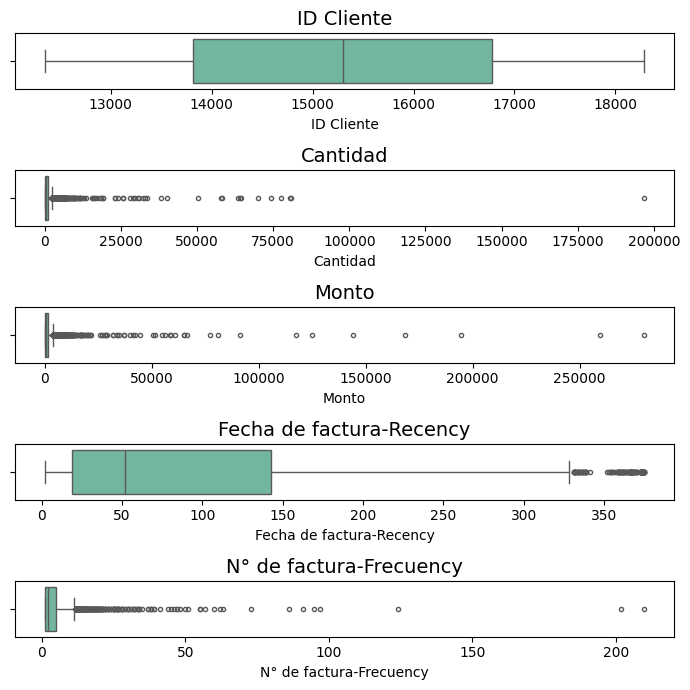

In [5]:
#Independizamos cada boxplot en su propia escala
plt.style.use('default')
plt.figure(figsize = (7,7))
for i in range(5):
    plt.subplot(5, 1, i+1)
    sns.boxplot(data = customer_mtdataset[customer_mtdataset.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
    plt.title(customer_mtdataset.columns[i], fontsize=14)
    plt.tight_layout()

In [7]:
#Se crean las columnas con etiquetas
customer_mtdataset['Monetary']=pd.qcut(customer_mtdataset['Monto'],q=5, labels=[1,2,3,4,5])
customer_mtdataset['Recency']=pd.qcut(customer_mtdataset['Fecha de factura-Recency'],q=5, labels=[5,4,3,2,1])
customer_mtdataset['Frecuency']=pd.qcut(customer_mtdataset['N° de factura-Frecuency'].rank(method='first'),q=5, labels=[1,2,3,4,5])


In [9]:
#Se crea la columna de Score
customer_mtdataset["RFM_SCORE"] = (customer_mtdataset['Recency'].astype(str) + customer_mtdataset['Frecuency'].astype(str))

In [11]:
#Se crea la segmentación
seg_map = {r'[1-2][1-2]': 'hibernating',r'[1-2][3-4]': 'at_Risk',r'[1-2]5': 'cant_loose',r'3[1-2]': 'about_to_sleep',r'33': 'need_attention',r'[3-4][4-5]': 'loyal_customers',r'41': 'promising',r'51': 'new_customers',r'[4-5][2-3]': 'potential_loyalists',r'5[4-5]': 'champions'}

In [12]:
#Se crea la columna de segmentación 
customer_mtdataset['seg']=customer_mtdataset['RFM_SCORE'].replace(seg_map, regex=True)

In [14]:
#Conteo por tipo de clientes
customer_mtdataset['seg'].value_counts()

seg
hibernating            1064
loyal_customers         828
champions               633
at_Risk                 581
potential_loyalists     493
about_to_sleep          351
need_attention          184
promising                99
cant_loose               63
new_customers            42
Name: count, dtype: int64

In [16]:
#Se cambia el formato de las nuevas columnas
customer_mtdataset['Recency']=customer_mtdataset['Recency'].astype(int)
customer_mtdataset['Monetary']=customer_mtdataset['Monetary'].astype(int)
customer_mtdataset['Frecuency']=customer_mtdataset['Frecuency'].astype(int)

In [18]:
#Media y conteo de las nuevas columnas
customer_mtdataset[["seg", "Recency","Frecuency", "Monetary" ]].groupby("seg").agg(["mean", "count"])

Recency       Frecuency        Monetary      
                         mean count      mean count      mean count
seg                                                                
about_to_sleep       3.000000   351  1.532764   351  2.039886   351
at_Risk              1.672978   581  3.363167   581  3.018933   581
cant_loose           1.809524    63  5.000000    63  4.301587    63
champions            5.000000   633  4.691943   633  4.459716   633
hibernating          1.376880  1064  1.470865  1064  1.860902  1064
loyal_customers      3.609903   828  4.443237   828  4.142512   828
need_attention       3.000000   184  3.000000   184  2.858696   184
new_customers        5.000000    42  1.000000    42  1.714286    42
potential_loyalists  4.391481   493  2.636917   493  2.598377   493
promising            4.000000    99  1.000000    99  1.626263    99

In [19]:
#Se usa una base de datos principal
mtdataset = pd.read_csv('../data/raw/ventas-por-factura.csv')

In [20]:
#customer_mtdataset.columns = customer_mtdataset.columns.str.strip()

In [24]:
#Se unen las dos bases de datos
df_final = pd.merge(mtdataset, customer_mtdataset[['seg', 'ID Cliente']], on='ID Cliente')

In [36]:
customer_mtdataset.to_parquet('../data/processed/microtageting_mtdataset.parquet')

In [37]:
df_final.to_parquet('../data/processed/final_mtdataset.parquet')